Task: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors

### Data Loading and Overview 

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,normaltest,shapiro
from sklearn.model_selection import train_test_split
import warnings as w
w.filterwarnings("ignore")

### Importing Dataset

In [56]:
df=pd.read_csv(r"C:\Users\Akash\Desktop\IT Vedant\Diving Into world of data (DWD)\Datasets\Road Accident Data.csv")

### Data Preview

In [61]:
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,05-01-2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,04-01-2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,05-01-2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,06-01-2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


### Display the number of Rows and Columns 

In [62]:
print("Size of Dataset:",df.size)

Size of Dataset: 7083379


In [63]:
row,columns=df.shape
print("Rows :",row)
print("Columns :",columns)

Rows : 307973
Columns : 23


In [65]:
# Convert date & time columns
df['Accident Date'] = pd.to_datetime(df['Accident Date'],format='%d-%m-%Y')
df['Year'] = df['Accident Date'].dt.year

In [66]:
df.drop(columns=["Latitude","Longitude"],inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Month                       307973 non-null  object        
 3   Day_of_Week                 307973 non-null  object        
 4   Year                        307973 non-null  int32         
 5   Junction_Control            307973 non-null  object        
 6   Junction_Detail             307973 non-null  object        
 7   Accident_Severity           307973 non-null  object        
 8   Light_Conditions            307973 non-null  object        
 9   Local_Authority_(District)  307973 non-null  object        
 10  Carriageway_Hazards         5424 non-null    object        
 11  Number_of_Casualties        307973 non-

In [68]:
df.describe()

,Accident Date,Year,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,2021.468934,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,2021.000000,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,2021.000000,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,2021.000000,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,2022.000000,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,2022.000000,48.000000,32.000000,70.000000
std,NaN,0.499035,0.815857,0.710477,14.032933


### Data Cleaning 

In [69]:
df.isna().sum()

Accident_Index                     0
Accident Date                      0
Month                              0
Day_of_Week                        0
Year                               0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.reset_index(inplace=True)
df

,index,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,195,200901BS70234,2021-05-13,May,Wednesday,2021,Give way or uncontrolled,T or staggered junction,Slight,Daylight,...,2,1,Metropolitan Police,Dry,Single carriageway,30,19:00,Urban,Fine no high winds,Car
1,414,200901BS70488,2021-09-04,Sep,Friday,2021,Auto traffic signal,Crossroads,Slight,Daylight,...,1,1,Metropolitan Police,Dry,Single carriageway,30,15:55,Urban,Fine no high winds,Car
2,476,200901BS70562,2021-10-06,Oct,Tuesday,2021,Auto traffic signal,T or staggered junction,Slight,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:36,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
3,854,200901CP00246,2021-09-24,Sep,Thursday,2021,Data missing or out of range,Not at junction or within 20 metres,Serious,Daylight,...,1,1,City of London,Dry,Single carriageway,30,08:35,Urban,Fine no high winds,Car
4,889,200901CP00294,2021-10-05,Oct,Monday,2021,Give way or uncontrolled,T or staggered junction,Slight,Daylight,...,1,1,City of London,Wet or damp,Single carriageway,30,16:10,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,307902,201091NK02693,2022-05-26,May,Wednesday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,...,1,1,Northern,Dry,Single carriageway,60,07:25,Rural,Fine no high winds,Car
5301,307911,201091NK04184,2022-08-23,Aug,Monday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,...,1,1,Northern,Wet or damp,Single carriageway,60,20:15,Rural,Raining no high winds,Car
5302,307918,201091NK05765,2022-11-14,Nov,Sunday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,...,1,1,Northern,Dry,Single carriageway,60,01:00,Rural,Fine + high winds,Car
5303,307960,201091NM00770,2022-01-21,Jan,Thursday,2022,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - lighting unknown,...,2,4,Northern,Snow,Single carriageway,60,18:20,Rural,Snowing + high winds,Car


In [72]:
df.isna().sum()

index                         0
Accident_Index                0
Accident Date                 0
Month                         0
Day_of_Week                   0
Year                          0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

#### Accident Trend Analysis (Yearly & Monthly)

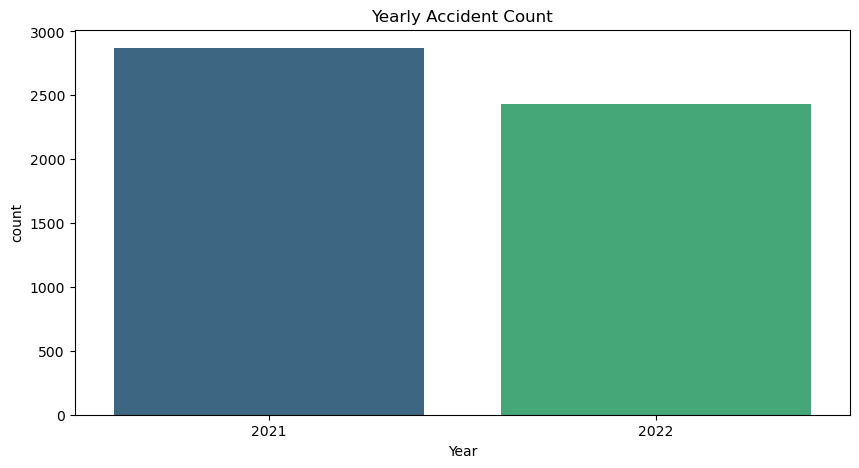

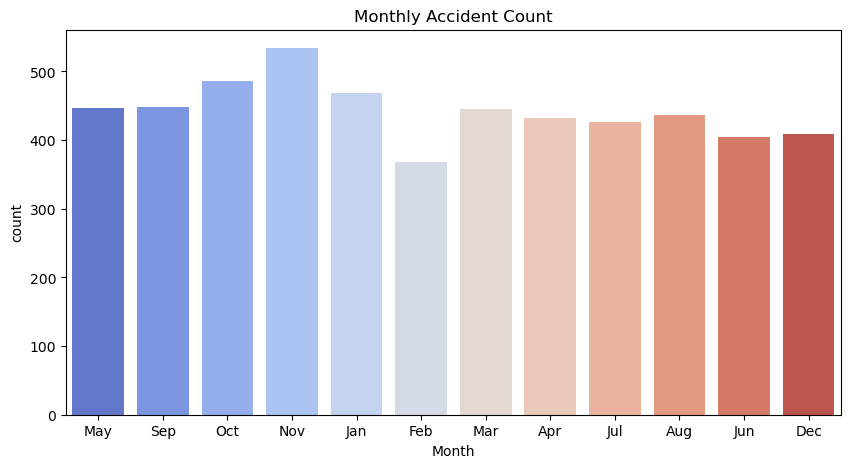

In [73]:
# Yearly Trend
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], palette="viridis")
plt.title("Yearly Accident Count")
plt.show()

# Monthly Trend
plt.figure(figsize=(10,5))
sns.countplot(x=df['Month'], palette="coolwarm")
plt.title("Monthly Accident Count")
plt.show()

#### Accident Severity Distribution

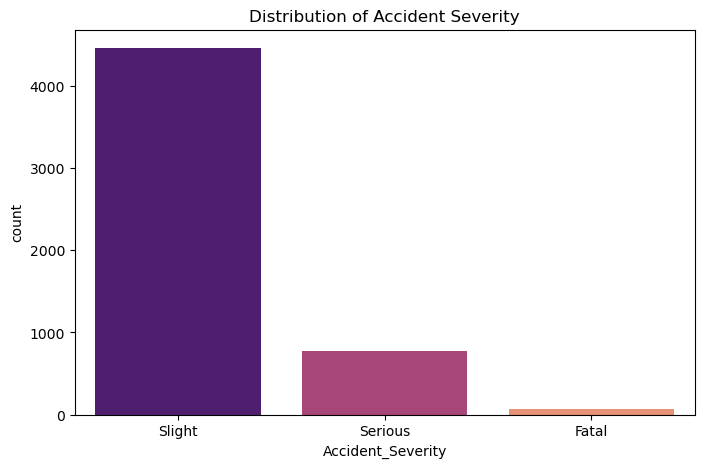

In [74]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Accident_Severity'], palette="magma")
plt.title("Distribution of Accident Severity")
plt.show()

#### Time-Based Accident Analysis

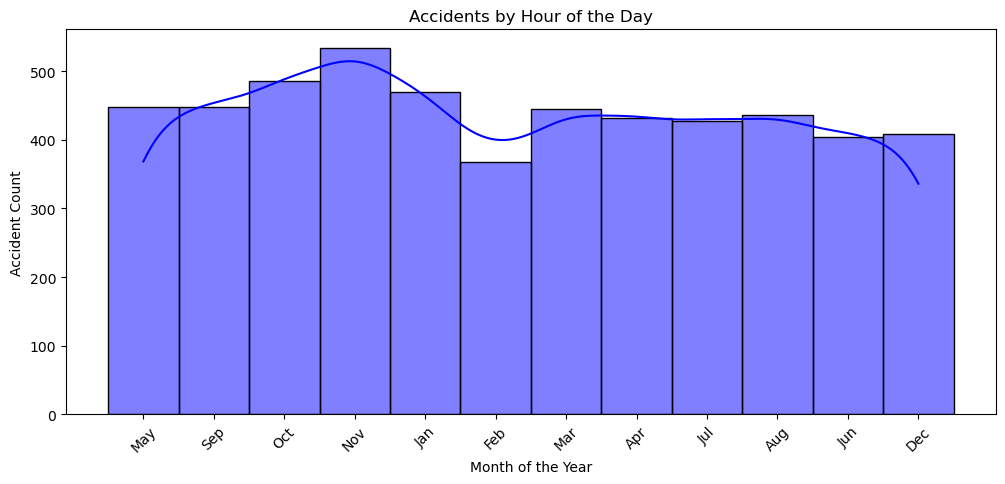

In [78]:
plt.figure(figsize=(12,5))
sns.histplot(df['Month'], bins=24, kde=True, color='blue')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Month of the Year")
plt.ylabel("Accident Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

plt.show()

#### Road Surface & Weather Condition Impact

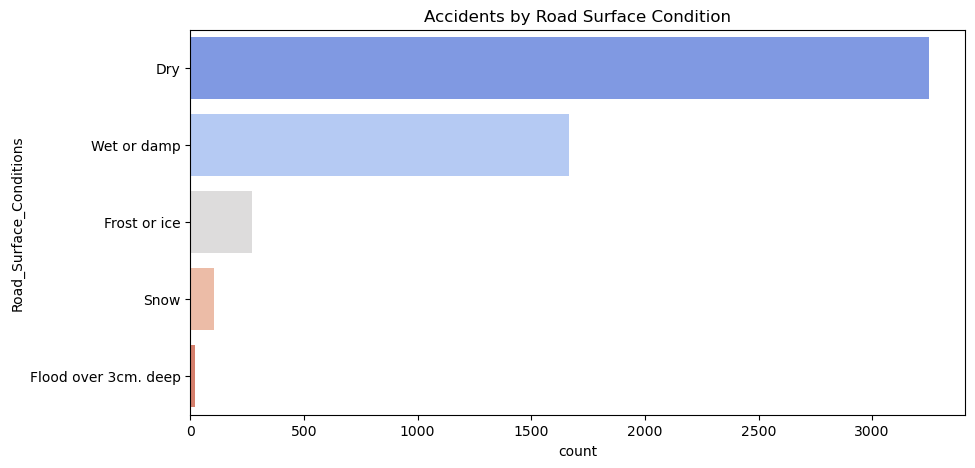

******************************************************************************************************************************************************


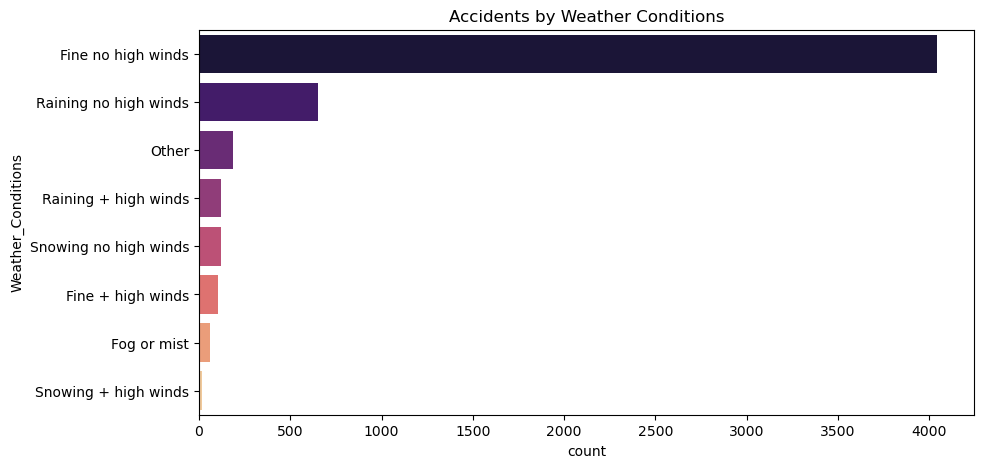

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Road_Surface_Conditions'], order=df['Road_Surface_Conditions'].value_counts().index, palette="coolwarm")
plt.title("Accidents by Road Surface Condition")
plt.show()
print("*"*150)

plt.figure(figsize=(10,5))
sns.countplot(y=df['Weather_Conditions'], order=df['Weather_Conditions'].value_counts().index, palette="magma")
plt.title("Accidents by Weather Conditions")
plt.show()

#### Urban vs Rural Accident Comparison

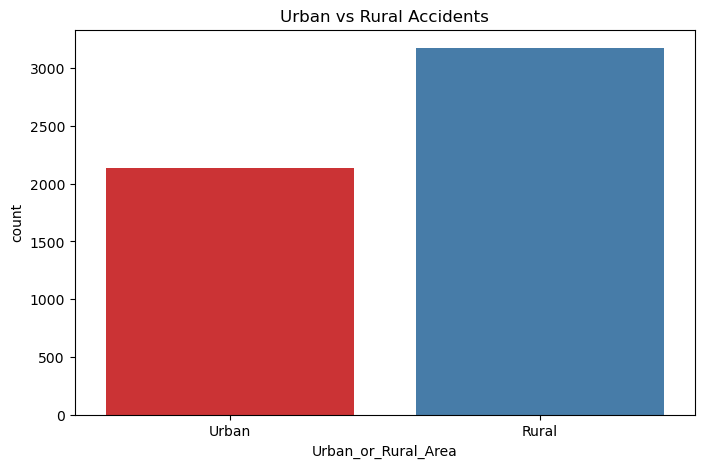

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Urban_or_Rural_Area'], palette="Set1")
plt.title("Urban vs Rural Accidents")
plt.show()

#### Vehicle Type Involvement in Accidents

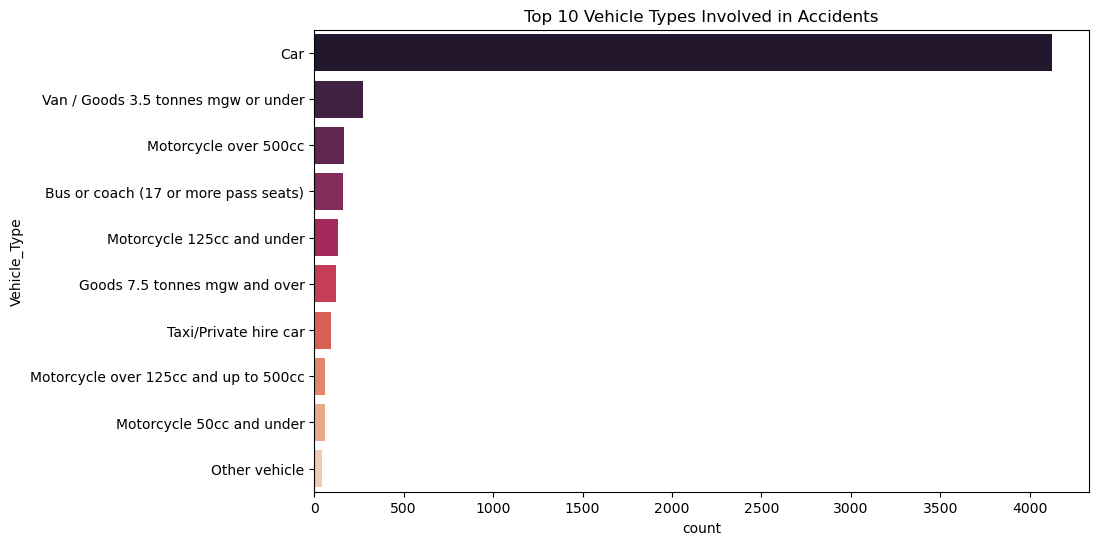

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Vehicle_Type'], order=df['Vehicle_Type'].value_counts().index[:10], palette="rocket")
plt.title("Top 10 Vehicle Types Involved in Accidents")
plt.show()

#### Final Insights: